In [363]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

from sklearn.model_selection import train_test_split

import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans

from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score

from scipy.cluster.hierarchy import linkage, dendrogram

import pickle

from torch.autograd import Variable
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

import torch.utils.data as data_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

In [364]:
%pip install ucimlrepo

In [365]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938)

In [548]:
# data (as pandas dataframes)
x = regensburg_pediatric_appendicitis.data.features
y = regensburg_pediatric_appendicitis.data.targets

In [549]:
df = pd.merge(
    x,
    y,
    how='inner',
    left_index=True, right_index=True
)
df.head(5)
target = 'Management'

In [560]:
df = df[["Age", "BMI", "Height", "Weight", "Length_of_Stay", "Alvarado_Score",
        "Body_Temperature", "Paedriatic_Appendicitis_Score", "WBC_Count", 'Hemoglobin',
        "RBC_Count", "Neutrophil_Percentage", "Hemoglobin", "RDW", 'Length_of_Stay',
        "Thrombocyte_Count", "CRP", 'Management', 'Appendix_Diameter', 'US_Performed', 'Sex']]

In [561]:
df = df.drop(df[df['Management'] == 'simultaneous appendectomy'].index)
df = df.drop(df[df['Management'] == 'conservative'].index)
#df = df.drop(['Severity', 'Diagnosis'], axis=1)

In [562]:
for column in df.select_dtypes(include=['number']).columns:
  df[column].fillna(df[column].mean(), inplace=True)
for column in df.select_dtypes(include=['object']).columns:
  df[column].fillna('no', inplace=True)

In [563]:
df = df.drop(df[df['Management'] == 'no'].index)

In [564]:
labels = df[target].unique()
labels

array(['primary surgical', 'secondary surgical'], dtype=object)

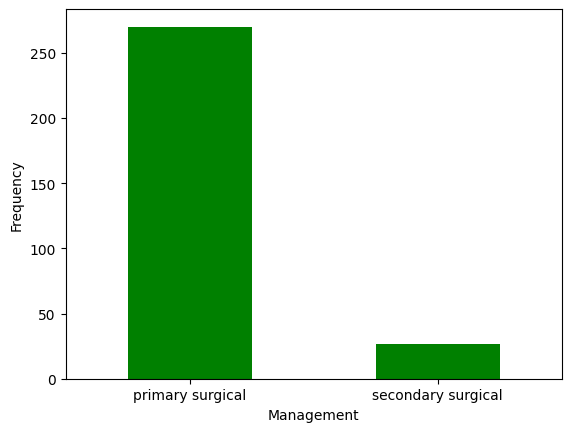

In [565]:
count_classes = pd.value_counts(df[target], sort = True)
count_classes.plot(kind = 'bar', rot=0, color="g")
plt.xticks(range(2), labels)
plt.xlabel("Management")
plt.ylabel("Frequency");

Наш набор данных несбалансирован.

In [566]:
x = df.copy()

In [567]:
cat_columns = x.select_dtypes(['object']).columns
x[cat_columns] = x[cat_columns].apply ( lambda x: pd.factorize (x)[ 0 ])
x=(x-x.min())/(x.max()-x.min())
x.head(5)

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Body_Temperature,Paedriatic_Appendicitis_Score,WBC_Count,Hemoglobin,...,Neutrophil_Percentage,Hemoglobin,RDW,Length_of_Stay,Thrombocyte_Count,CRP,Management,Appendix_Diameter,US_Performed,Sex
484,0.401416,0.366655,0.572993,0.316077,0.222222,0.6250,0.136364,0.500000,0.598291,0.183453,...,0.725806,0.183453,0.031830,0.222222,0.568852,0.526027,0.0,0.388849,0.0,0.0
485,0.611111,0.469702,0.697080,0.484428,0.111111,0.7500,0.613636,0.625000,0.344729,0.194245,...,0.796188,0.194245,0.031830,0.111111,0.326230,0.361644,0.0,0.388849,0.0,0.0
486,0.681917,0.263608,0.744526,0.379209,0.222222,0.8750,0.227273,0.875000,0.430199,0.244604,...,0.862170,0.244604,0.022546,0.222222,0.167213,0.457534,0.0,0.388849,0.0,0.0
487,0.538671,0.415269,0.737226,0.484428,0.222222,0.5000,0.272727,0.250000,0.310541,0.165468,...,0.570381,0.165468,0.006631,0.222222,0.227869,0.002740,0.0,0.206349,0.0,0.0
488,0.238562,0.321123,0.386861,0.175084,0.370370,0.6353,0.340909,0.506086,0.447293,0.129496,...,0.723536,0.129496,0.050398,0.370370,0.547541,0.383562,0.0,0.388849,0.0,0.0


In [568]:
df_train, df_test = model_selection.train_test_split(x, test_size=0.2, random_state=47)

In [569]:
X_train = df_train.drop(target,axis=1)
y_train = df_train[target]

X_test = df_test.drop(target,axis=1)
y_test = df_test[target]

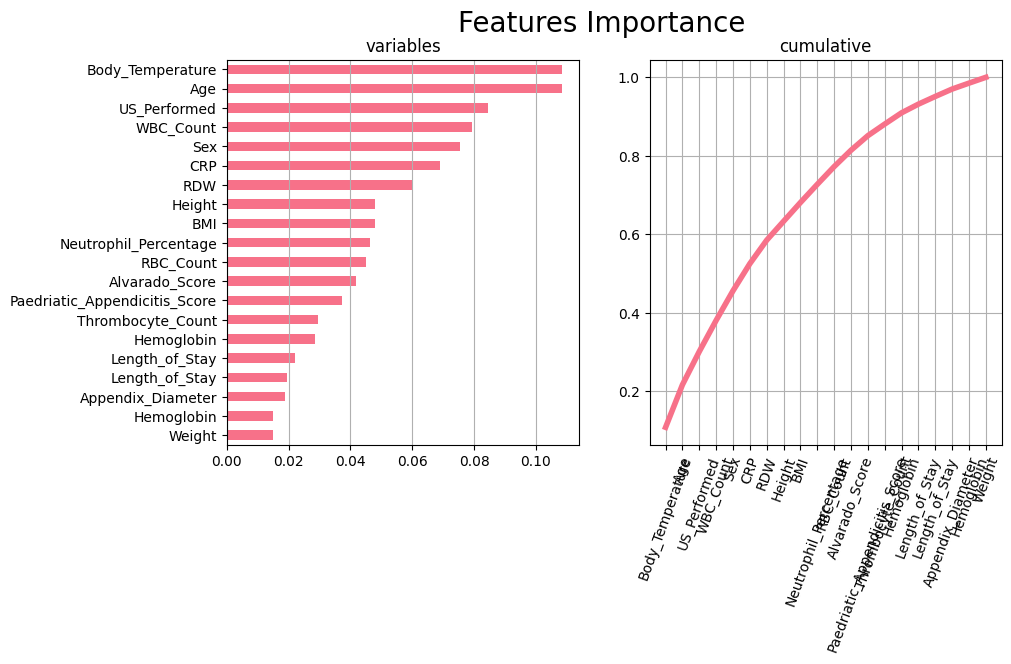

In [570]:
X = X_train.values
y = y_train.values
feature_names = X_train.columns.tolist()

model = ensemble.RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X,y)
importances = model.feature_importances_

dtf_importances = pd.DataFrame({"IMPORTANCE":importances,
                                "VARIABLE":feature_names}).sort_values("IMPORTANCE",
                                                                       ascending=False)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False,figsize=(10,5),dpi=100)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
    kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4,
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)),
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')

plt.show()

In [571]:
primaryDF = df[df[target] == 'primary surgical']
secondaryDF = df[df[target] == 'secondary surgical']

In [572]:
primaryDF.shape

(270, 21)

In [573]:
secondaryDF.shape

(27, 21)

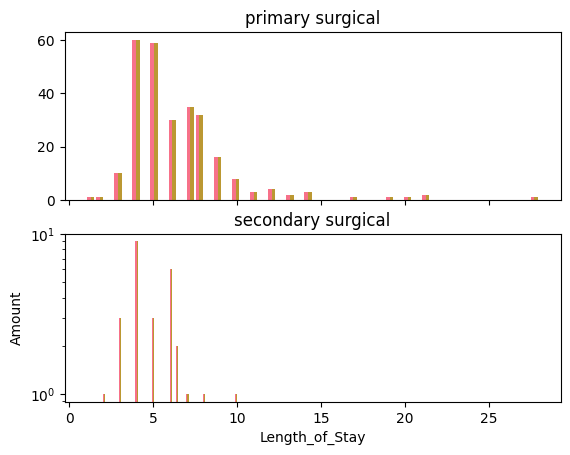

In [574]:
f, (ax2, ax3) = plt.subplots(2, 1, sharex=True)

bins = 50

feature = 'Length_of_Stay'

ax2.hist(primaryDF[feature], bins = bins)
ax2.set_title('primary surgical')

ax3.hist(secondaryDF[feature], bins = bins)
ax3.set_title('secondary surgical')

plt.xlabel(feature)
plt.ylabel('Amount')
plt.yscale('log')
plt.show();

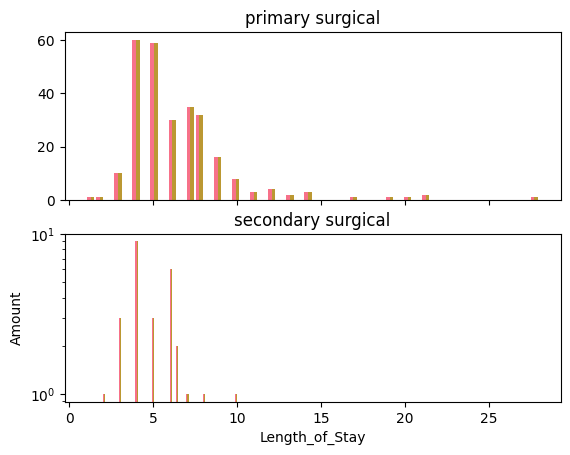

In [575]:
f, (ax2, ax3) = plt.subplots(2, 1, sharex=True)

bins = 50

feature = 'Length_of_Stay'

ax2.hist(primaryDF[feature], bins = bins)
ax2.set_title('primary surgical')

ax3.hist(secondaryDF[feature], bins = bins)
ax3.set_title('secondary surgical')

plt.xlabel(feature)
plt.ylabel('Amount')
plt.yscale('log')
plt.show();

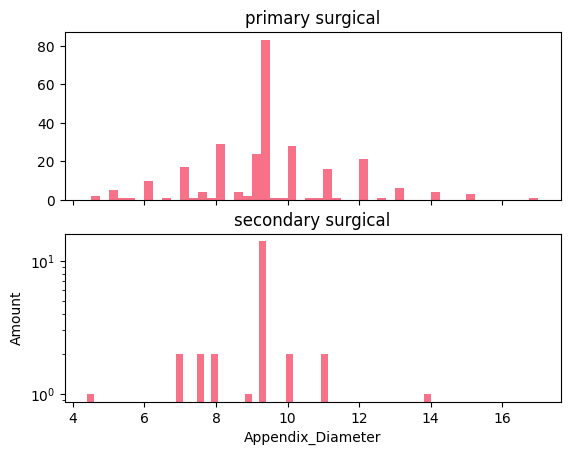

In [576]:
f, (ax2, ax3) = plt.subplots(2, 1, sharex=True)

bins = 50

feature = 'Appendix_Diameter'

ax2.hist(primaryDF[feature], bins = bins)
ax2.set_title('primary surgical')

ax3.hist(secondaryDF[feature], bins = bins)
ax3.set_title('secondary surgical')

plt.xlabel(feature)
plt.ylabel('Amount')
plt.yscale('log')
plt.show();

### Разделите набор данных на наборы обучающих и тестовых данных.

Мы разделили набор данных как обучение = 80% и тест = 20%. В обучающем наборе данных будут только обычные транзакции, а в тестовом наборе данных будут как обычные, так и мошеннические транзакции.

In [577]:
X_train, X_test = train_test_split(x, test_size=0.2, random_state=47)
X_train = X_train[X_train[target] == 0]
X_train = X_train.drop([target], axis=1)

y_test = X_test[target]
X_test = X_test.drop([target], axis=1)

X_train = X_train.values
X_test = X_test.values
y_test = y_test.values

print(X_train.size)
print(y_test.size)

4400
60


## Model

In [581]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(20, 10),
            nn.LeakyReLU(),
            nn.Linear(10, 5),
            nn.LeakyReLU(),
            )

        self.decoder = nn.Sequential(
           nn.Linear(5, 10),
           nn.LeakyReLU(),
           nn.Linear(10, 20),
           nn.LeakyReLU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [639]:
model = Autoencoder().double()

num_epochs = 300
minibatch_size = 128

train_loader = data_utils.DataLoader(X_train, batch_size=minibatch_size, shuffle=True)
test_loader = data_utils.DataLoader(X_test, batch_size=1, shuffle=False)
criterion = nn.MSELoss()
optimizer = torch.optim.Adadelta(model.parameters())
history = {}
history['train_loss'] = []
history['test_loss'] = []

In [640]:
for epoch in range(num_epochs):
    h = np.array([])
    for data in train_loader:
        # ===================forward=====================
        output = model(data)
        loss = criterion(output, data)
        h = np.append(h, loss.item())
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    mean_loss = np.mean(h)
    if((epoch+1)%5==0):
        print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, num_epochs, mean_loss))
    history['train_loss'].append(mean_loss)

torch.save(model.state_dict(), './credit_card_model.pth')

epoch [5/300], loss:0.1413
epoch [10/300], loss:0.1145
epoch [15/300], loss:0.0840
epoch [20/300], loss:0.0697
epoch [25/300], loss:0.0677
epoch [30/300], loss:0.0679
epoch [35/300], loss:0.0613
epoch [40/300], loss:0.0580
epoch [45/300], loss:0.0579
epoch [50/300], loss:0.0577
epoch [55/300], loss:0.0573
epoch [60/300], loss:0.0573
epoch [65/300], loss:0.0572
epoch [70/300], loss:0.0551
epoch [75/300], loss:0.0555
epoch [80/300], loss:0.0549
epoch [85/300], loss:0.0527
epoch [90/300], loss:0.0527
epoch [95/300], loss:0.0526
epoch [100/300], loss:0.0525
epoch [105/300], loss:0.0383
epoch [110/300], loss:0.0316
epoch [115/300], loss:0.0299
epoch [120/300], loss:0.0295
epoch [125/300], loss:0.0295
epoch [130/300], loss:0.0296
epoch [135/300], loss:0.0292
epoch [140/300], loss:0.0290
epoch [145/300], loss:0.0286
epoch [150/300], loss:0.0290
epoch [155/300], loss:0.0285
epoch [160/300], loss:0.0287
epoch [165/300], loss:0.0283
epoch [170/300], loss:0.0284
epoch [175/300], loss:0.0281
epoch

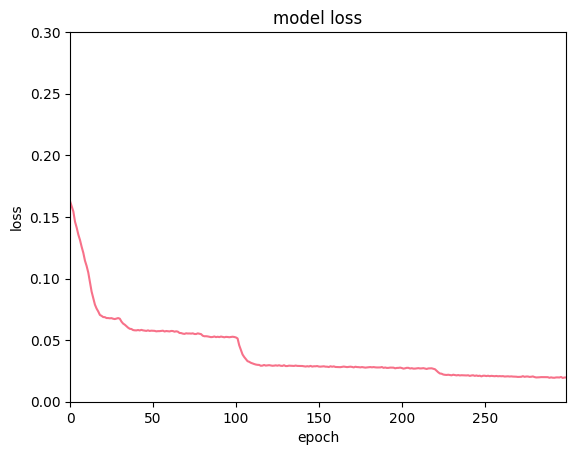

In [641]:
plt.plot(history['train_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.axis([0, epoch, 0, 0.3])
plt.show()

## Оценка модели

In [642]:
pred_losses = {'pred_loss' : []}
model.eval()
with torch.no_grad():
    for data in test_loader:
        inputs = data
        outputs = model(inputs)
        loss = criterion(outputs, inputs).data.item()
        pred_losses['pred_loss'].append(loss)

reconstructionErrorDF = pd.DataFrame(pred_losses)
reconstructionErrorDF['Class'] = y_test

In [644]:
reconstructionErrorDF.describe()

,pred_loss,Class
count,60.000000,60.000000
mean,0.019331,0.166667
std,0.011441,0.375823
min,0.005852,0.000000
25%,0.011009,0.000000
50%,0.016971,0.000000
75%,0.023785,0.000000
max,0.060370,1.000000


In [645]:
reconstructionErrorDF.describe()

,pred_loss,Class
count,60.000000,60.000000
mean,0.019331,0.166667
std,0.011441,0.375823
min,0.005852,0.000000
25%,0.011009,0.000000
50%,0.016971,0.000000
75%,0.023785,0.000000
max,0.060370,1.000000


# Reconstruction Errors primary surgical

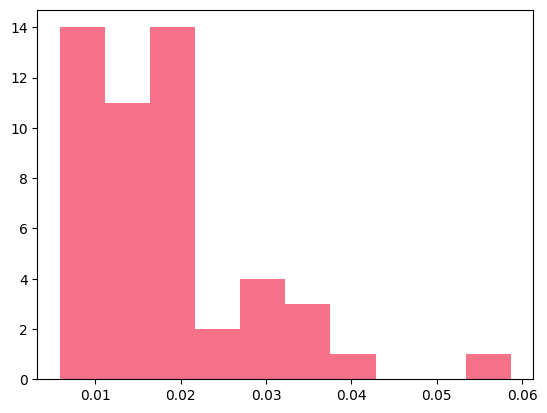

In [646]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = reconstructionErrorDF[(reconstructionErrorDF['Class']== 0) & (reconstructionErrorDF['pred_loss'] < 10)]
_ = ax.hist(normal_error_df.pred_loss.values, bins=10)

# Reconstruction Errors secondary surgical

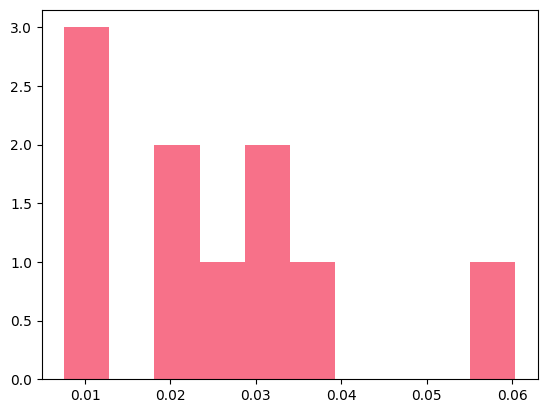

In [647]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = reconstructionErrorDF[(reconstructionErrorDF['Class']== 1) ]
_ = ax.hist(fraud_error_df.pred_loss.values, bins=10)

## ROC Curves

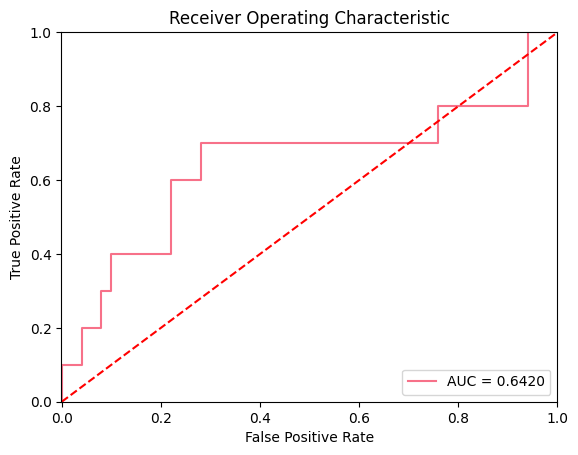

In [643]:
fpr, tpr, thresholds = roc_curve(reconstructionErrorDF.Class, reconstructionErrorDF.pred_loss)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

## Precision vs Recall

Установка порога, который используется для принятия решения о классификации в модели, — это способ настроить компромисс между точностью (precision) и полнотой (recall) для данного классификатора.

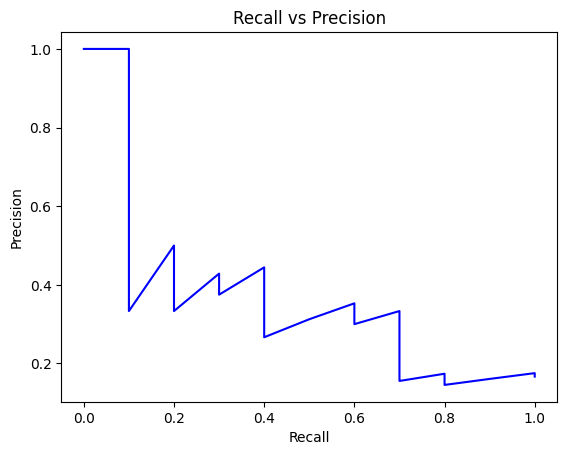

In [648]:
precision, recall, th = precision_recall_curve(reconstructionErrorDF.Class, reconstructionErrorDF.pred_loss)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

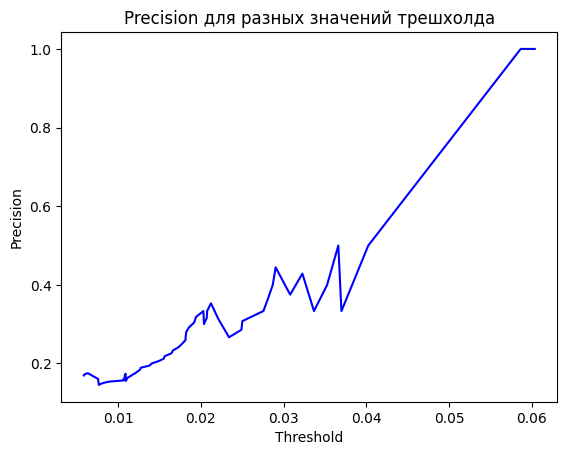

In [649]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision для разных значений трешхолда')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

Вы можете видеть, что по мере увеличения ошибки реконструкции повышается и наша precision. Давайте посмотрим на recall:


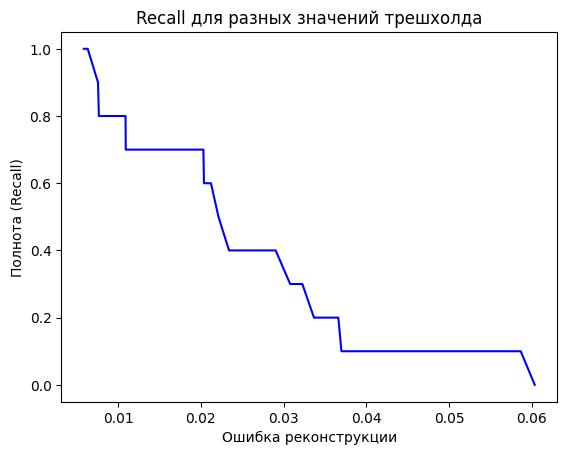

In [650]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall для разных значений трешхолда')
plt.xlabel('Ошибка реконструкции')
plt.ylabel('Полнота (Recall)')
plt.show()

Здесь мы имеем прямо противоположную ситуацию. По мере увеличения ошибки реконструкции recall (полнота) уменьшается.

## Используем модель для того, чтобы сделать предсказание

Чтобы предсказать, является ли новая/невидимая транзакция нормальной или мошеннической, мы рассчитаем ошибку реконструкции на основе самих данных транзакции. Если ошибка превышает предопределенный порог, мы помечаем ее как мошенничество (поскольку наша модель должна иметь низкую ошибку при обычных транзакциях). Давайте выберем это значение:

In [664]:
threshold = 0.029

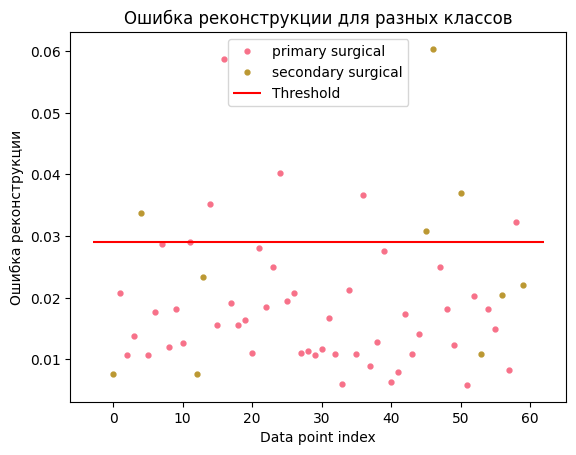

In [665]:
groups = reconstructionErrorDF.groupby('Class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.pred_loss, marker='o', ms=3.5, linestyle='',
            label= "secondary surgical" if name == 1 else "primary surgical")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Ошибка реконструкции для разных классов")
plt.ylabel("Ошибка реконструкции")
plt.xlabel("Data point index")
plt.show();

Построим и посмотрим confusion matrix:

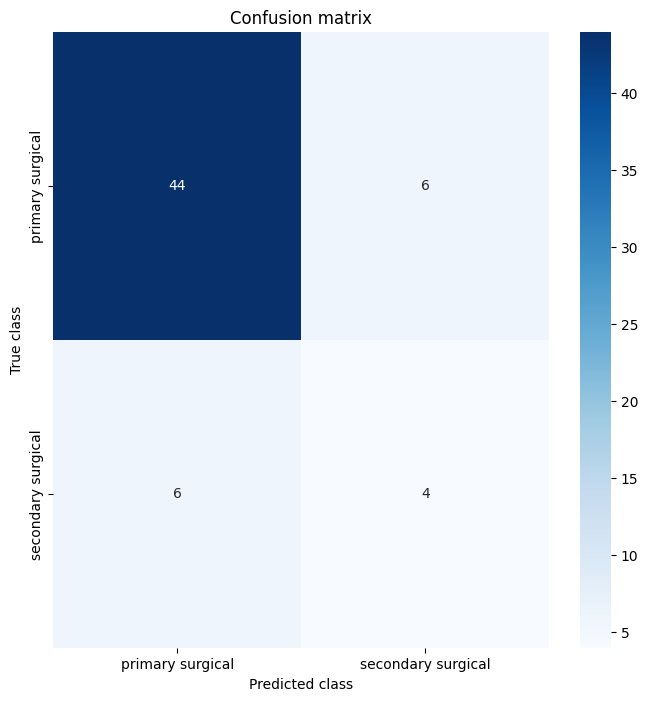

In [666]:
y_pred = [1 if e > threshold else 0 for e in reconstructionErrorDF.pred_loss.values]
conf_matrix = confusion_matrix(reconstructionErrorDF.Class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d",
            cmap=plt.cm.get_cmap('Blues'));
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()